# 🩺 Breast Cancer Classification Project

## 1. Dataset Description
We will be working with the **Breast Cancer Wisconsin Diagnostic Dataset**.  
- The dataset contains **569 records** of patients.  
- Each record has **30 numerical features** (e.g., radius, texture, perimeter, smoothness, etc.) that describe characteristics of cell nuclei present in breast cancer tissue.  
- The **target variable** is `Diagnosis`, which has two classes:
  - **M (Malignant)**
  - **B (Benign)**  

This is a **binary classification problem**, and we will use **Logistic Regression** to build our model.



In [1]:
import pandas as pd

# The data is in a .data file and separated by commas.
# The first few lines are metadata and should be skipped.

features = features = [
    "ID number",
    "Diagnosis",
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "radius_worst",
    "texture_worst",
    "perimeter_worst",
    "area_worst",
    "smoothness_worst",
    "compactness_worst",
    "concavity_worst",
    "concave points_worst",
    "symmetry_worst",
    "fractal_dimension_worst"
]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                 comment='#', sep=',',names=features)



## 2. Project Tasks

### 🔍 Step 1: Data Investigation
- Load the dataset and display its first few rows.
- Check for **null values** and **duplicate entries**.
- Explore the dataset summary (shape, data types, statistics).

### 📊 Step 2: Data Visualization
- Visualize distributions of features.
- Use histograms, boxplots, or pairplots to understand data spread.
- Check relationships between features and the target variable (`Diagnosis`).
- Check count of categorical features and whether classes are balanced or not

### ⚙️ Step 3: Data Preprocessing
- **Encoding:** Convert the categorical column `Diagnosis` into numeric values (e.g., Malignant = 1, Benign = 0).
- **Scaling:** Apply appropriate scaling (e.g., StandardScaler) to numeric features.
- **Drop irrelevant columns** like `ID number`.

### ✂️ Step 4: Train-Test Split
- Split the dataset into **train** and **test** sets.  
- Use the parameter `stratify=y` to ensure class distribution remains the same in both sets.  
- Check if the classes are **balanced**:
  - If imbalanced, either:
    - Handle using techniques like oversampling/undersampling, SMOTE OR  
    - Use the `class_weight="balanced"` parameter in Logistic Regression.

### 🤖 Step 5: Model Training
- Train a **Logistic Regression** model on the training data.

### 📈 Step 6: Model Evaluation
Evaluate the model using:
1. **Confusion Matrix**  
   - Display the confusion matrix.  
   - Visualize it using a heatmap.  
2. **ROC Curve and AUC**  
   - Plot the ROC curve.  
   - Calculate the Area Under the Curve (AUC).  
3. **Classification Report**  
   - Report Precision, Recall, F1-score, and Accuracy.

### 📝 Step 7: Model Interpretation
- Compare **training vs testing performance**.  
- Write down your observations:  
  - Is the model performing well on both sets?  
  - Are there signs of **overfitting** or **underfitting**?  
  - What kind of errors is the model making (false positives vs false negatives)?  
  - What would be the medical consequences of these errors?
  - What is the error of our focus at this problem?


### Data Investigation:

In [2]:
pd.set_option('display.max_columns', None)
df

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.drop(columns=['ID number'],inplace=True)

In [4]:
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(569, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


-------

### Data Visualization:

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import math 

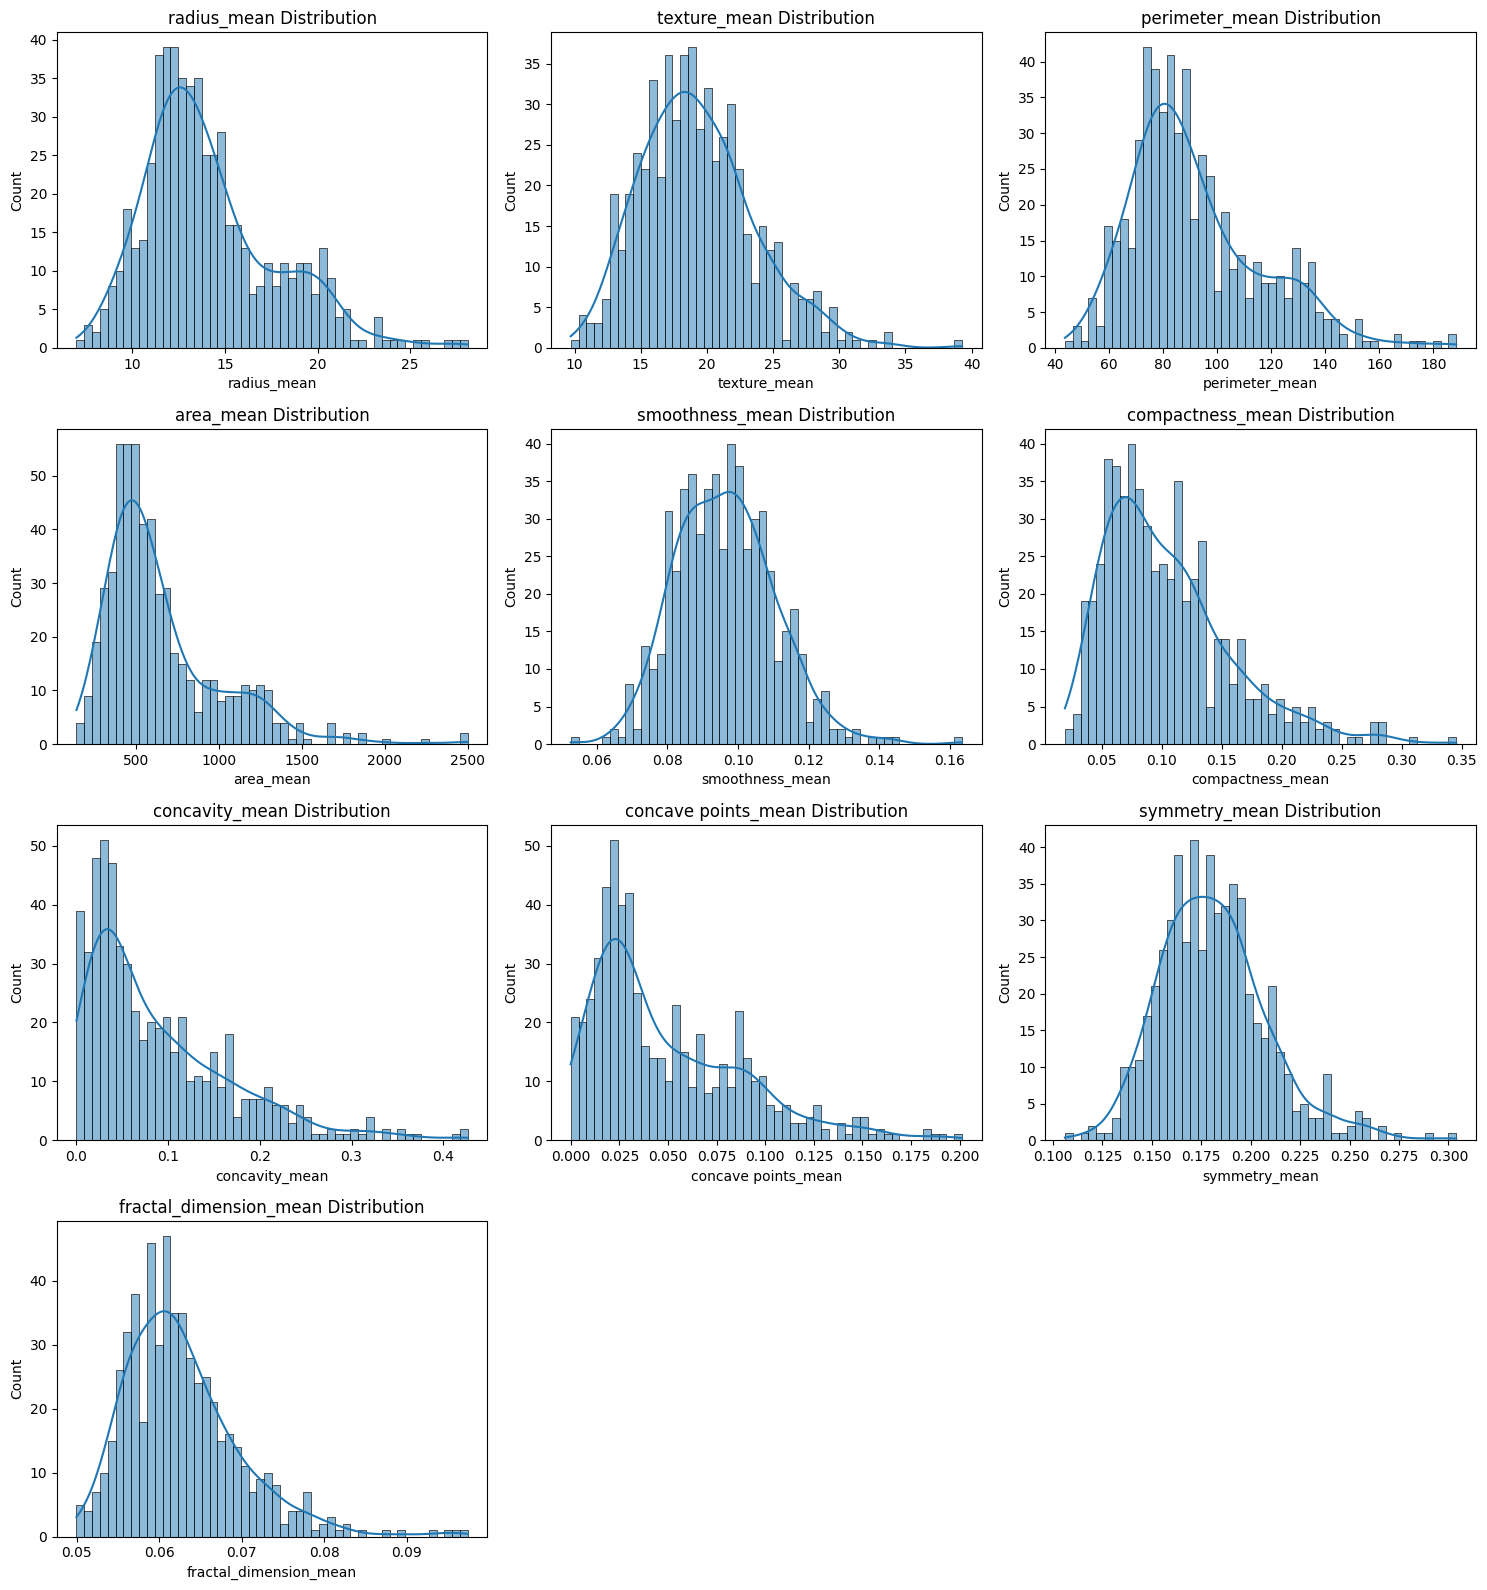

In [11]:
mean_features = [feature for feature in df.columns if feature.endswith("mean")]

num_features = len(mean_features)
cols = 3  
rows = math.ceil(num_features / cols) 

fig, axes = plt.subplots(rows, cols, figsize=(5* cols, 4*rows))
axes = axes.flatten()  # flatten to 1D 

for i, feature in enumerate(mean_features):
    sns.histplot(df[feature], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"{feature} Distribution")

for i in range(len(mean_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

> The mean distributions are mostly normal, with right skewness (differes in severity)

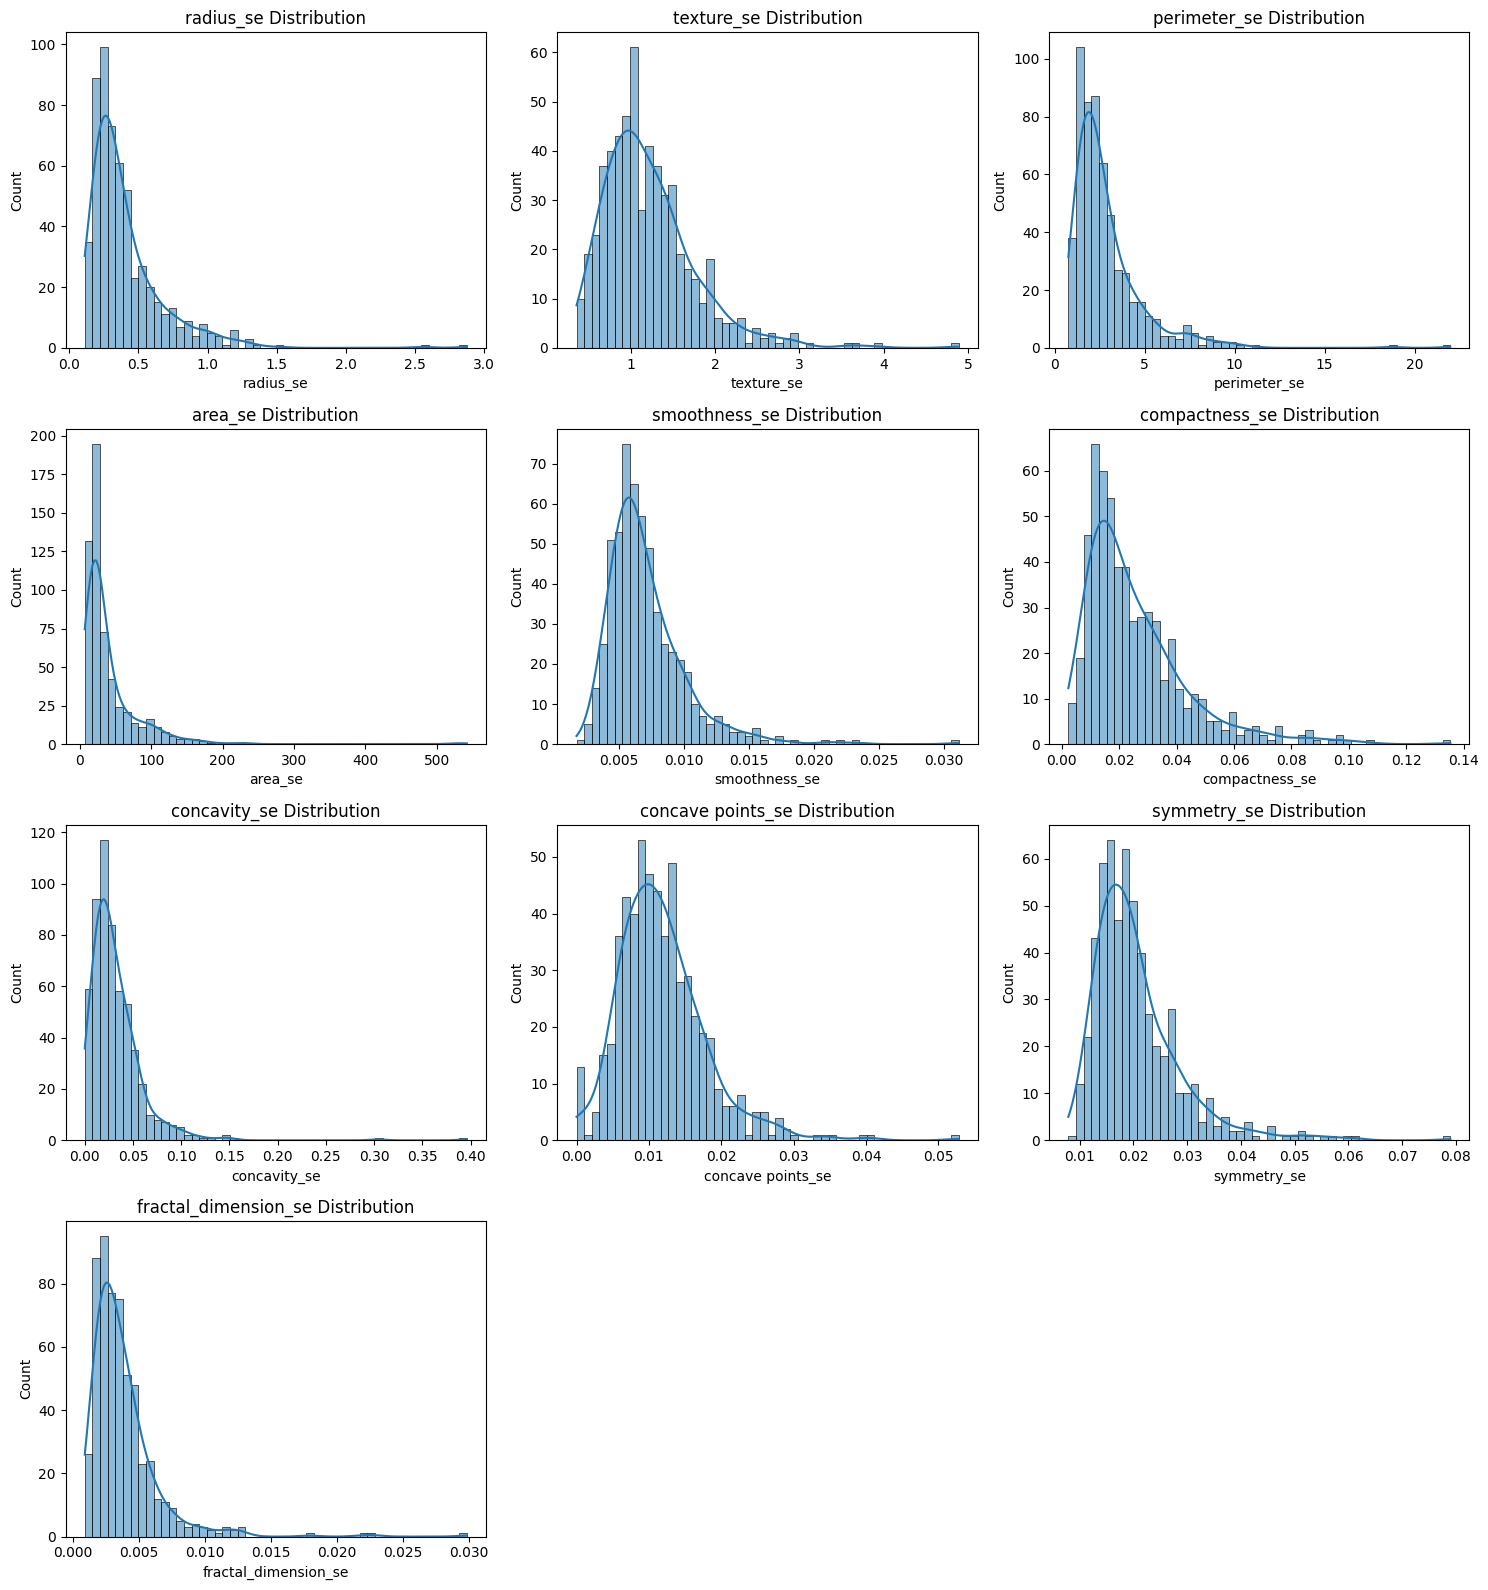

In [12]:
se_features = [feature for feature in df.columns if feature.endswith("se")]

num_features = len(se_features)
cols = 3  
rows = math.ceil(num_features / cols) 

fig, axes = plt.subplots(rows, cols, figsize=(5* cols, 4*rows))
axes = axes.flatten() 

for i, feature in enumerate(se_features):
    sns.histplot(df[feature], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"{feature} Distribution")

for i in range(len(se_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

> Most of 'se' distributions are heavly right skewed

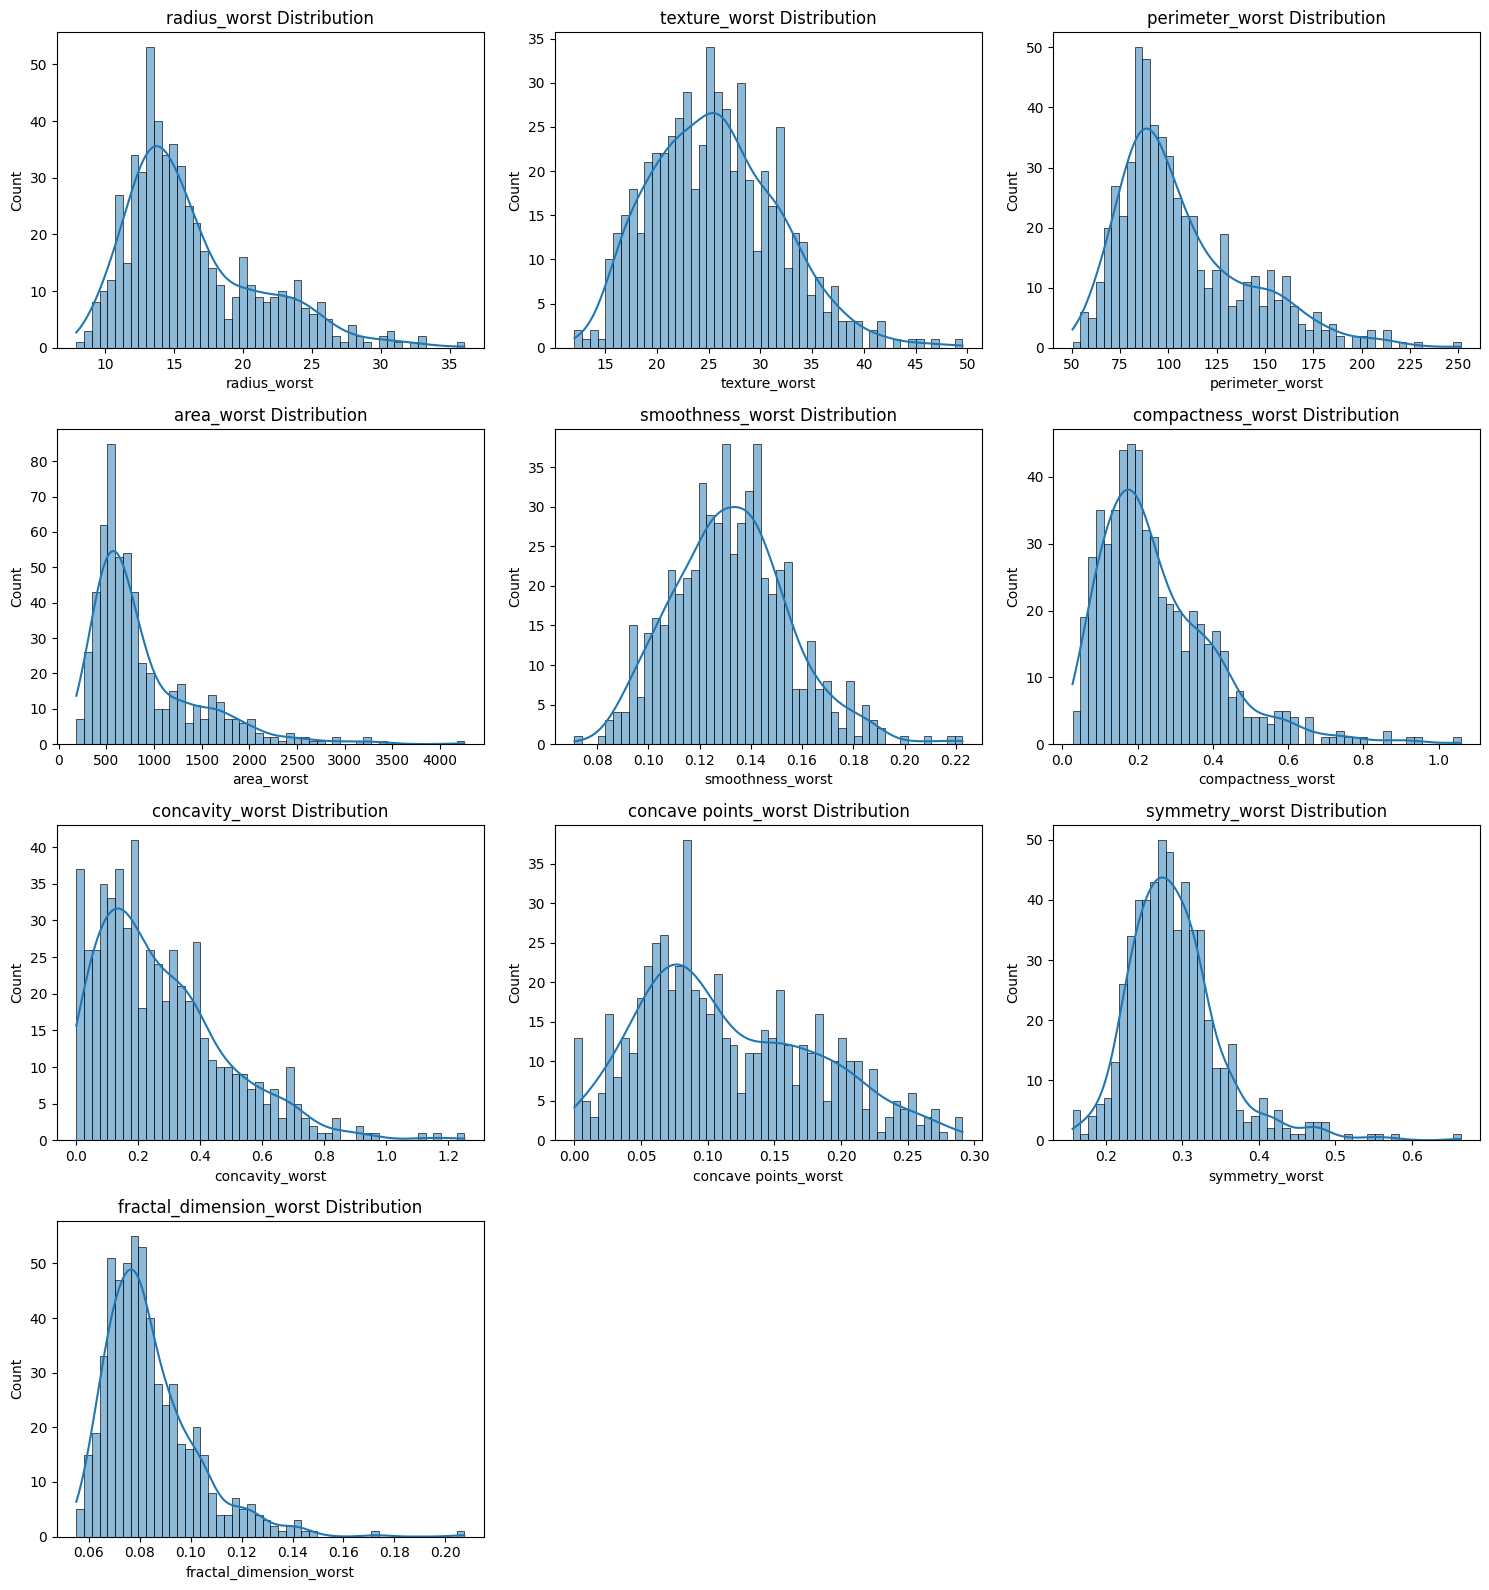

In [13]:
worst_features = [feature for feature in df.columns if feature.endswith("worst")]

num_features = len(worst_features)
cols = 3  
rows = math.ceil(num_features / cols) 

fig, axes = plt.subplots(rows, cols, figsize=(5* cols, 4*rows))
axes = axes.flatten()  

for i, feature in enumerate(worst_features):
    sns.histplot(df[feature], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"{feature} Distribution")

for i in range(len(worst_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

> The 'worst' distributions are normal, with some right skewness as well

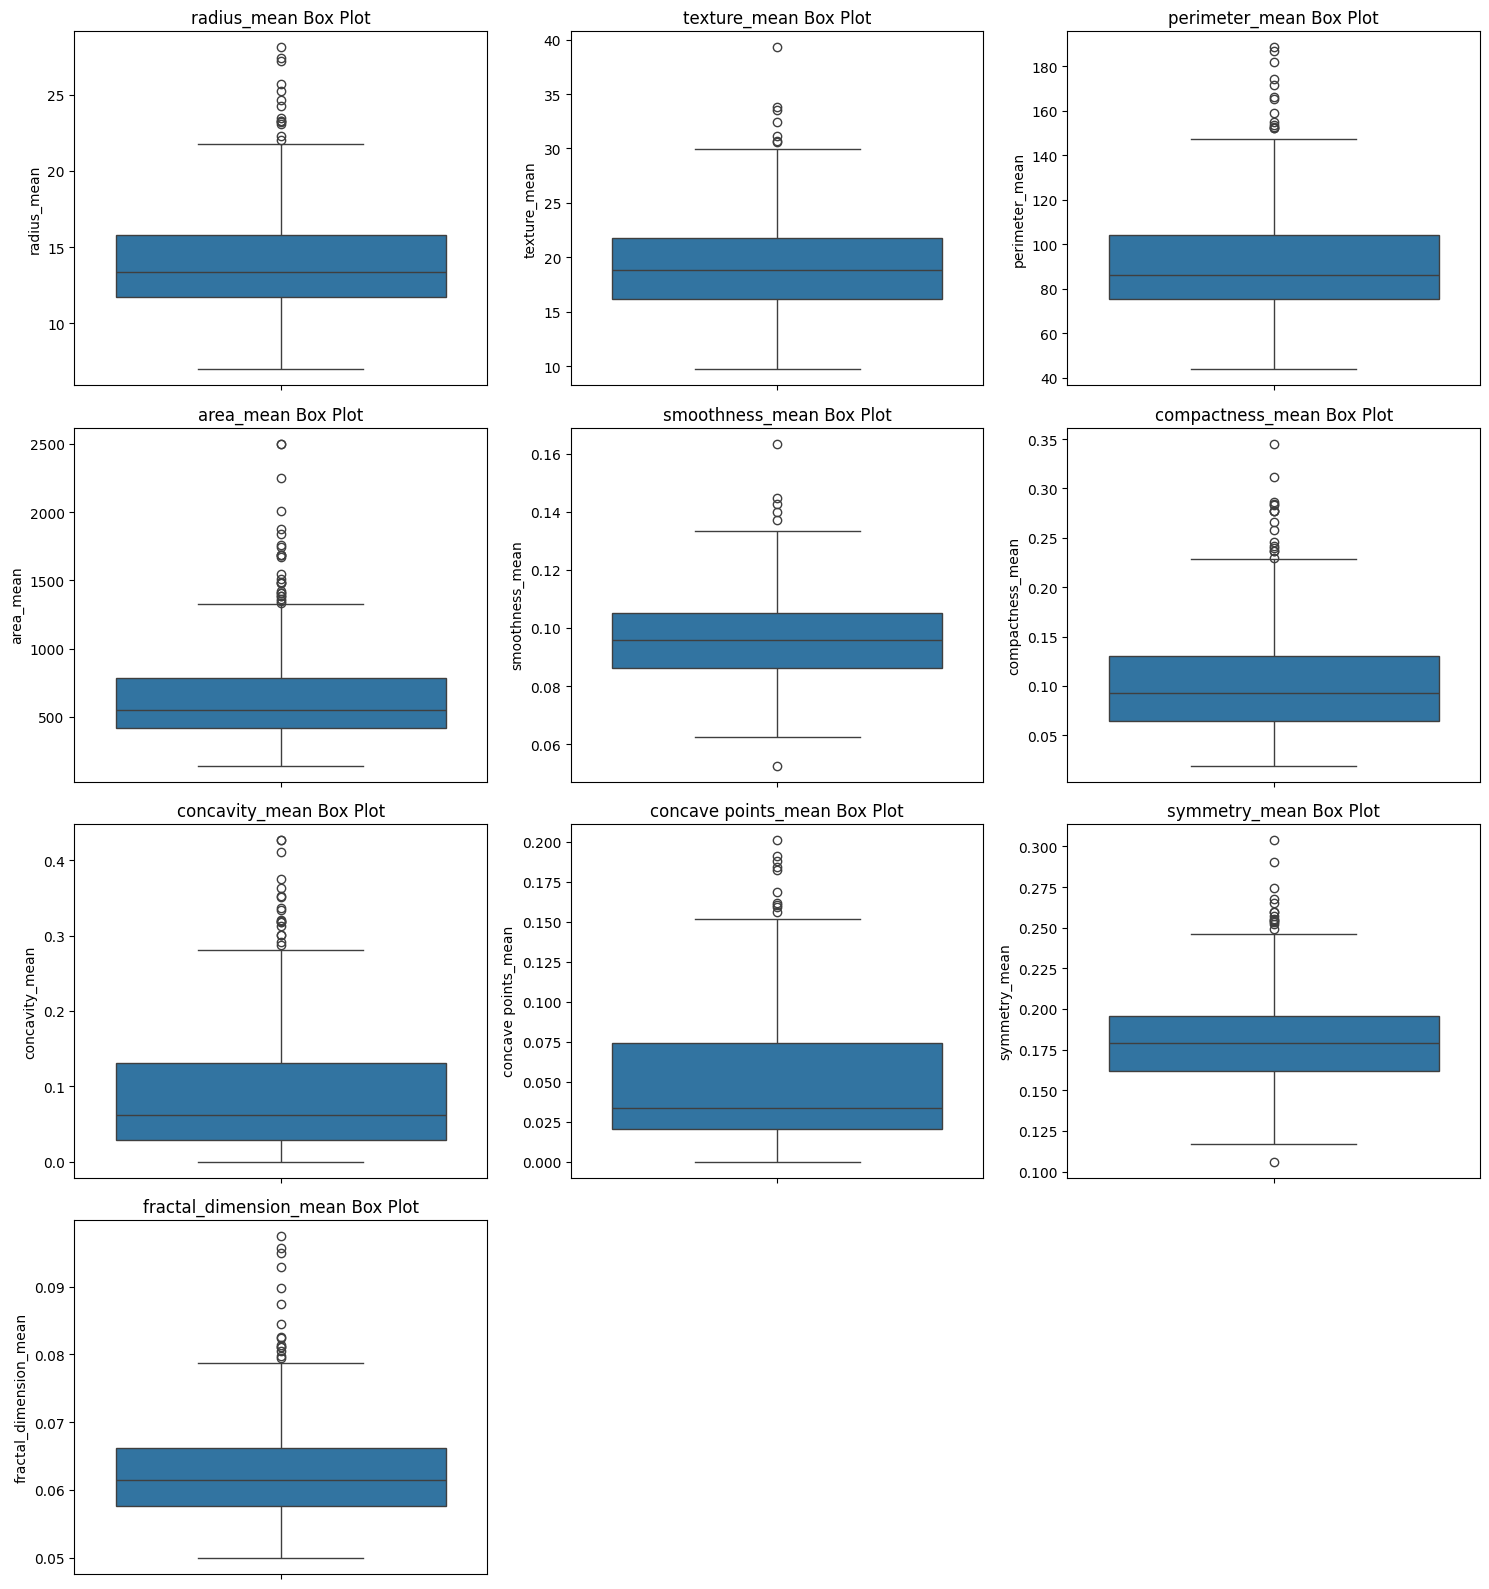

In [14]:
num_features = len(mean_features)
cols = 3  
rows = math.ceil(num_features / cols) 

fig, axes = plt.subplots(rows, cols, figsize=(5* cols, 4*rows))
axes = axes.flatten()  

for i, feature in enumerate(mean_features):
    sns.boxplot(df[feature], ax=axes[i])
    axes[i].set_title(f"{feature} Box Plot")

for i in range(len(mean_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

> 'mean' features has some potential to be addresed, however, given the data context some of these outliers might actually be plausible

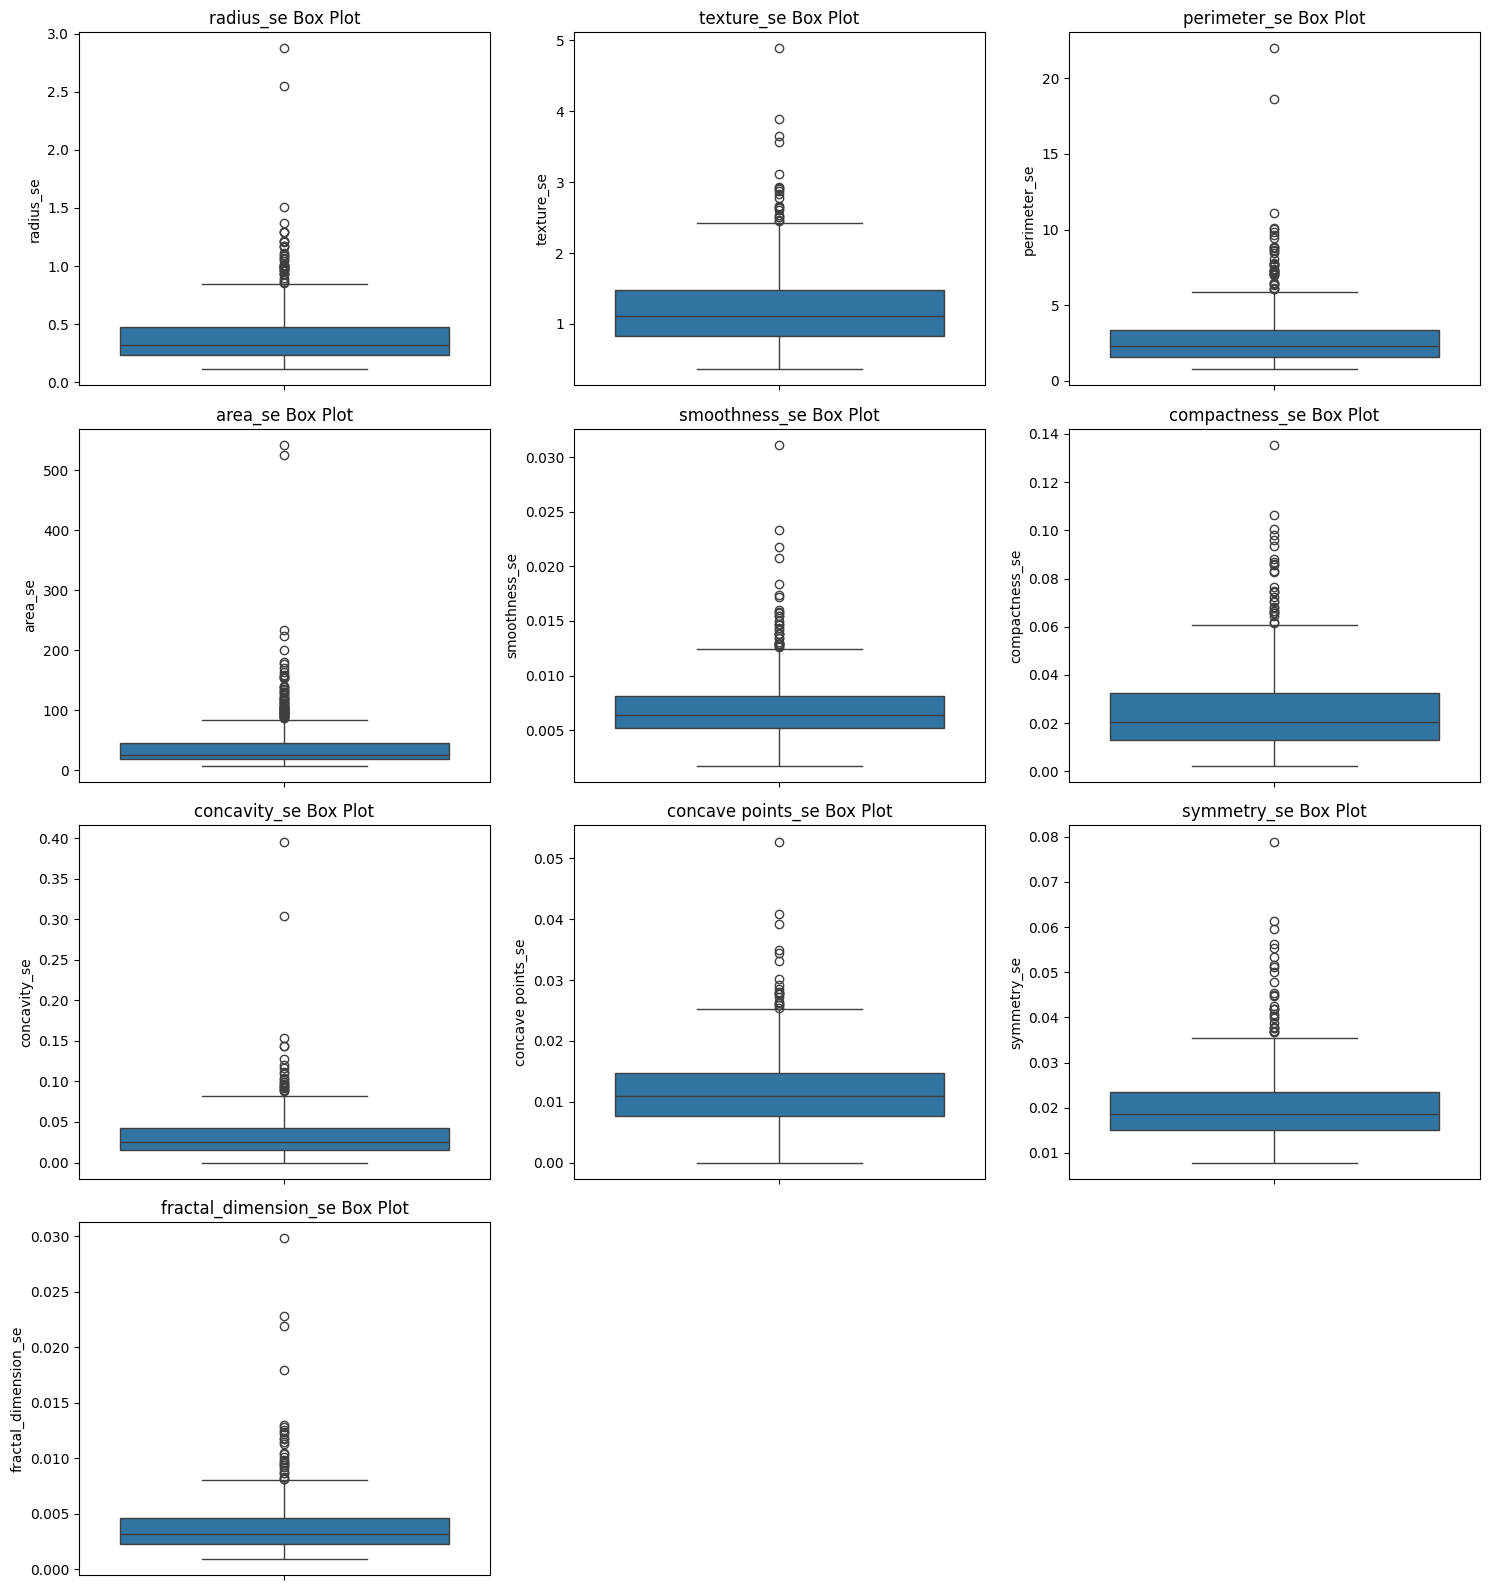

In [15]:
num_features = len(se_features)
cols = 3  
rows = math.ceil(num_features / cols) 

fig, axes = plt.subplots(rows, cols, figsize=(5* cols, 4*rows))
axes = axes.flatten()  

for i, feature in enumerate(se_features):
    sns.boxplot(df[feature], ax=axes[i])
    axes[i].set_title(f"{feature} Box Plot")

for i in range(len(se_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

> The Outliers/anomalies are heavier in case of the 'se' features, since the Standard Deviation is more sensitive to noise or irregularities in the cell structure.

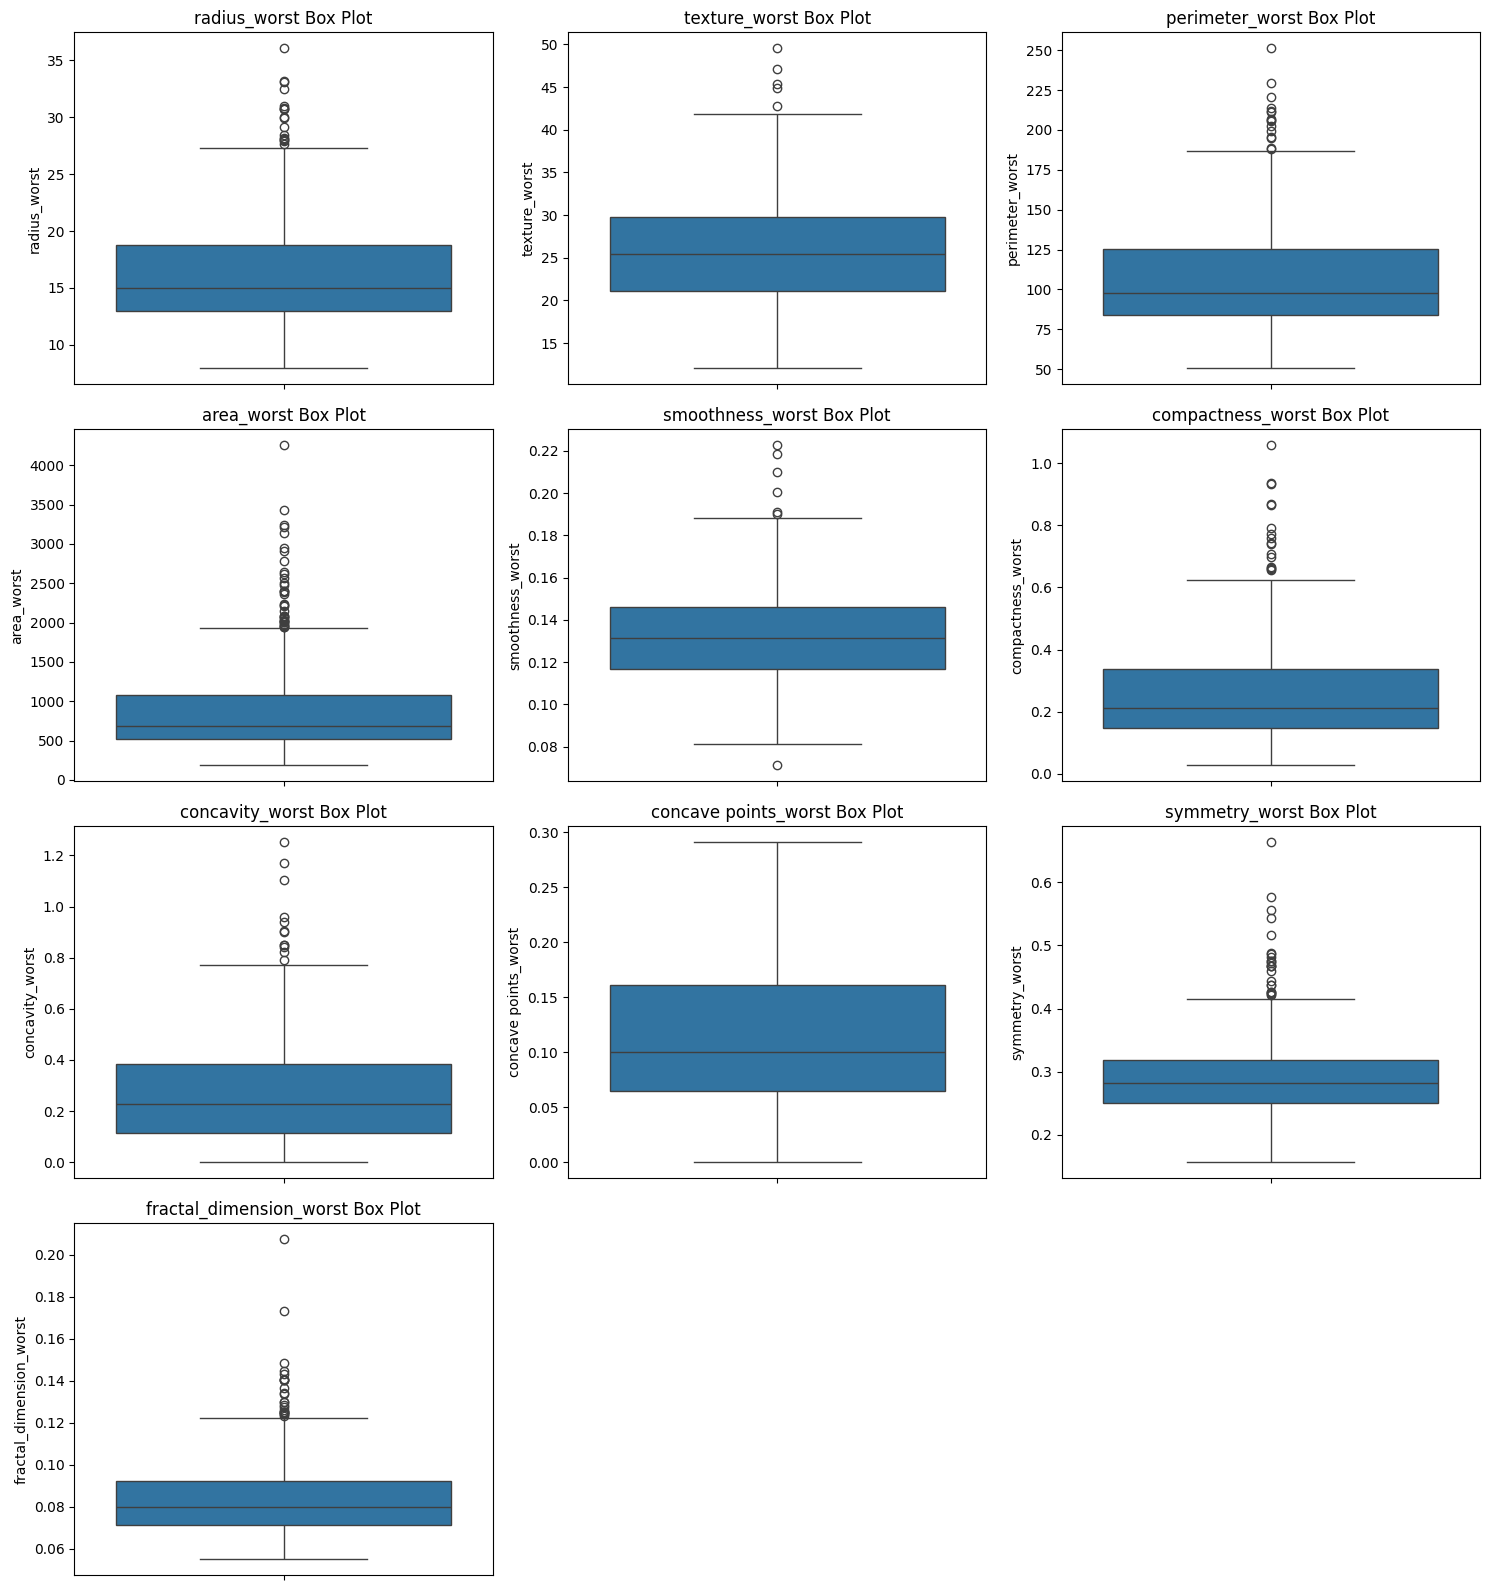

In [16]:
num_features = len(worst_features)
cols = 3  
rows = math.ceil(num_features / cols) 

fig, axes = plt.subplots(rows, cols, figsize=(5* cols, 4*rows))
axes = axes.flatten()  

for i, feature in enumerate(worst_features):
    sns.boxplot(df[feature], ax=axes[i])
    axes[i].set_title(f"{feature} Box Plot")

for i in range(len(worst_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

> Outliers are present in 'worst' features too, although they are more prounounced in some features than they are in others

In [17]:
# Map Encoding Target variable
target_values = {'M':1,'B':0}
df['Diagnosis'] = df['Diagnosis'].map(target_values)

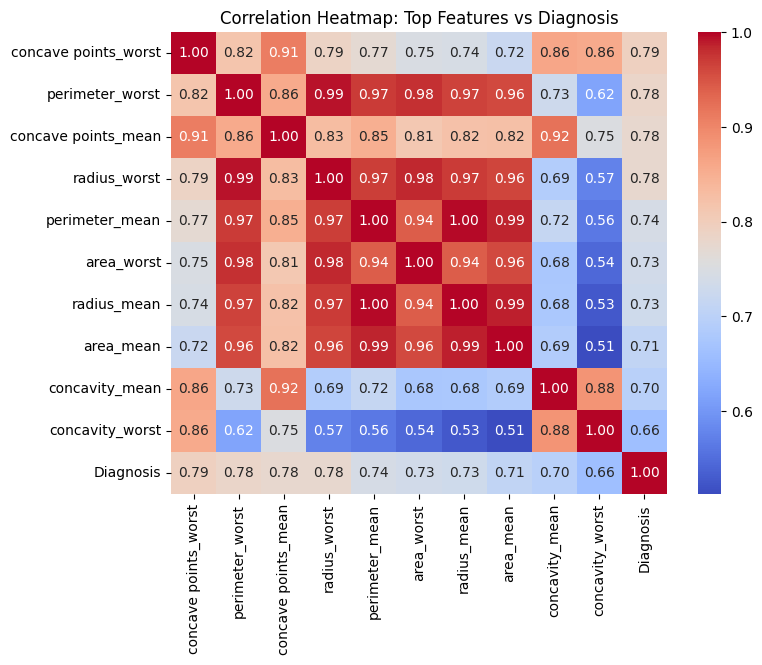

In [18]:
correlations = df.corr(numeric_only=True)['Diagnosis'].drop('Diagnosis')
correlations = correlations.sort_values(key=abs, ascending=False)

top_features = correlations.head(10).index

heatmap_data = df[top_features.tolist() + ['Diagnosis']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Top Features vs Diagnosis")
plt.show()

> Overall `mean` and `worst` features tend to have the strongest predictive power over the target decision `Diagnosis`

> `concave points worst` has the strongest predictive power "may be aided by other features (multicolinearity)"

> Different prespectives of a single observation in data are highly correlated with each other (e.g. `radius_mean` and `radius_worst`) 

> `area` is highly correlated with overall `radius` observations.

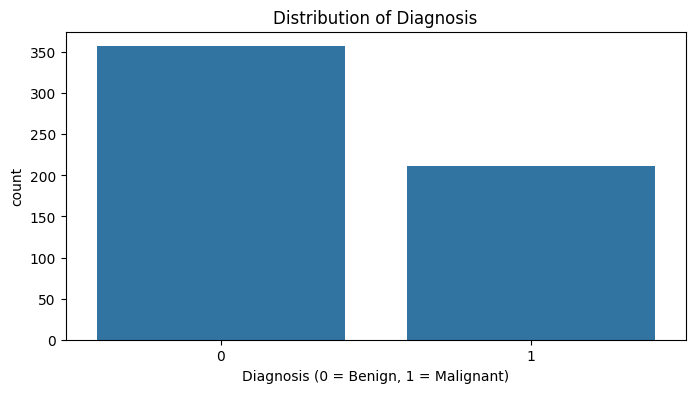

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Diagnosis', order=df['Diagnosis'].value_counts().index, data= df)
plt.title('Distribution of Diagnosis')
plt.xlabel("Diagnosis (0 = Benign, 1 = Malignant)")
plt.show()

> the target variable `Diagnosis` classes are imbalanced & should be handelled

-------------

### Scalling & Splitting:

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

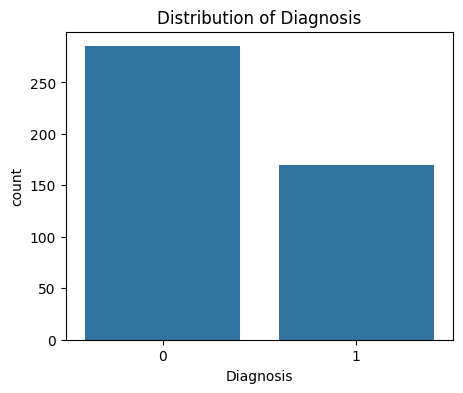

In [23]:
plt.figure(figsize=(5, 4))
sns.countplot(x=y_train)
plt.title('Distribution of Diagnosis')
plt.show()

In [24]:
# using SMOTE to ensure balanced sampling

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resambled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

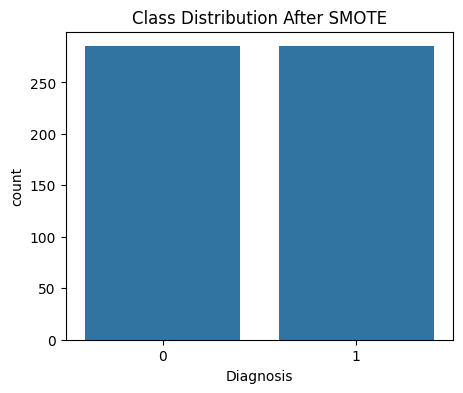

In [25]:
plt.figure(figsize=(5, 4))
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

---

### Model Training:

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_resambled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
y_pred = model.predict(X_test_scaled)

----------------

### Model Evaluation:

#### 1. Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

In [30]:
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[71  1]
 [ 2 40]]


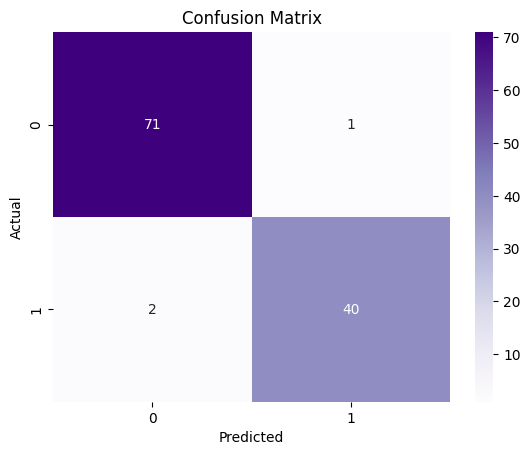

In [40]:
sns.heatmap(matrix, annot=True, fmt= '.2g', cmap= 'Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

> The Confusion Matrix shows that the model excellently predicts the target variable `Diagnosis`, with very liitle to no errors

#### 2. ROC Curve and AUC:

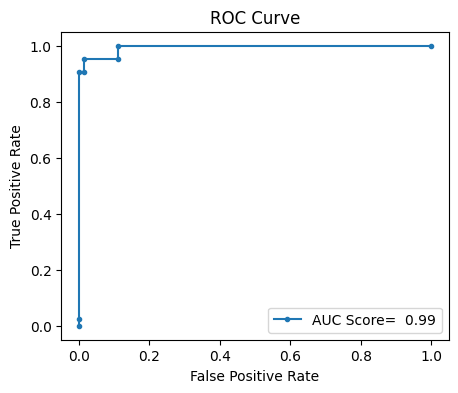

In [60]:
y_prob = model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, marker='.', label= f"AUC Score= {auc_score: .2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

> As seen from the `ROC-Curve` that the curve line is very much close to the upper lift part of the plot, with a huge `AUC` up to `0.99`(near Perfect classification)

> The results suggest that the logistic regression model is highly discriminative and very effective at differentiating between the positive and negative classes

#### 3. Classification Report:

In [61]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



The Classification Report further emphasises that the model performs pretty well:

> for every instance the model predicts as positive (class 1), 98% of the time, it's actually positive and similarly, for every instance predicted as negative (class 0), 97% of the time, it's actually negative.

> The model is very good at identifying negative instances 'calss 0' (99% of the true negatives are correctly identified) and is also quite good at identifying positive instances 'class 1' (95% of the true positives are detected), slight gap compared to Class 0 is rather normal given the difference in support between the two classes

> The model performs well for the positive class, balancing precision and recall (F1-score for class 1= 0.96), and it performs even better for the negative class, with a high balance of both precision and recall (F1-score for class 0= 0.98)

> Overall the model has Strong performance across all metrics

---

### Model Interpretation:

In [62]:
y_train_pred = model.predict(X_train_resambled)

In [64]:
matrix = confusion_matrix(y_train_resampled, y_train_pred)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[283   2]
 [  6 279]]


In [63]:
print("Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       285
           1       0.99      0.98      0.99       285

    accuracy                           0.99       570
   macro avg       0.99      0.99      0.99       570
weighted avg       0.99      0.99      0.99       570



> The model is performing extremely well on both the training and testing sets 

> Accuracy on both training and testing sets is great. indicating that the model is predicting the correct class most of the time, both for the training and unseen data

> Both the macro avg and weighted avg for precision, recall, and F1-score are excellent, showing balanced performance across classes

> As expected the trraining data has slight better metrics'scores comparing to test set, as unseen data is normally harder to predict.

> Since in both training and testing performance metrics are quite close (gaps are not too huge to concern) and very high, This suggests that overfitting is not present

> The way model shows strong performance across both sets means that it is clearly learning well from data, so there are no signs of underfitting

The model is mainly making two types of errors:

False positives: would mean diagnosing a patient as having a disease when they don’t

> FP Rate: (1 in test set/ 2 in training set) 

> Assessed by: Presison which is very high for both sets suggesting that the model is rarely predicting positive when the class is actually negative

False Negatives: means the model is missing a diagnosis (disease is present, but the model incorrectly predicts the patient as healthy) 

> FN Rate: (2 in test set/ 6 in training set) 

> Assessed by: Recall which is very high for both sets suggesting the model is rarely missing actual positive instances

> Medical Consequence of FP: may lead to unnecessary treatment, anxiety, or further testing (not preferred but not dangerous)

> Medical Consequence of FN: the patient may go untreated for a condition, which could lead to worsening health, or even life-threatining complications

`false negatives` are the error of primary focus in this case (critical medical diagnosis) as missing a true positive (false negative) could lead to delayed treatment or no treatment at all, which can have severe medical consequences, on the other hand, while false positives can lead to unnecessary treatments, they are generally less harmful than missing a critical diagnosis.

---------